# Statistics TV shows study

##### Bohdan Tymofieienko, B. S. 
###### btymofieienko@student.fontys.nl
##### Mikolaj Hilgert, M. A. 
###### m.hilgert@student.fontys.nl


##### 19 March 2022

### 1. Table of Contents <a class="anchor" id="chapter1"></a>


* [1. Table of Contents](#chapter1)
* [2. Revision history](#chapter2)
* [3. Abstract](#chapter3)
* [4. Introduction](#chapter4)
* [5. Questions](#chapter5)
* [6. Methodology](#chapter6)
* [7. Analysis](#chapter7)
* [8. Reasoning with Data](#chapter8)
* [9. Conclusion](#chapter9)
* [10. Bibliography](#chapter10)

### 2. Revision history <a class="anchor" id="chapter2"></a>

| Version | Author          | Date  | Change                                       |
|---------|-----------------|-------|----------------------------------------------|
| 0.1     | Bohdan, Mikolaj | 17.02 | Added table of contents and draft questions. |
| 0.1.1   | Bohdan | 19.02 | Added paragraphs(TBA). Added introduction and dataset |
| 0.2   | Bohdan, Mikolaj | 12.03 | Added hypothesis testing. Added visualization. |
| 0.2.1   | Bohdan, Mikolaj | 17.03 |  Added more visualization. |
| 1.0  | Bohdan, Mikolaj | 19.03 |  Added analysis, conclusion, abstract. |


### 3. Abstract <a class="anchor" id="chapter3"></a>

We had a thought that TV shows tend to get worse with the time, this lead us to come up with the following question and conduct the study. It aims to discover **to what extent does a TV series's life-span affect viewer perception for top rated shows**. We implemented a web scrapper and collected data from IMDB. We were able to derive and test another related sub-question. We assessed the question using hypothesis testing. We were not able to find any correlation between life-span of the TV show and it's rating. We tend to think there might exist more significant factors that affect viewer-perception which are outside the scope of this study.

### 4. Introduction  <a class="anchor" id="chapter4"></a>

It is often said that TV series are getting worse and worse with time. We decided to verify this statement in our own research. We will be using statistical methods to find a correlation between the longevity of the TV show and viewer perception. Since there might exist multiple reasons why this statement can be valid or wrong we will have to construct multiple hypotheses and perform our analysis.

### 5. Questions  <a class="anchor" id="chapter5"></a>

<ol>
<li>To what extent does a TV series's life-span affect viewer perception for top rated shows?</li>
<li>Are final episodes rated higher than the rest of the season?</li>
</ol>

### 6. Methodology  <a class="anchor" id="chapter6"></a>

The success and feasibility heavily depended on the availability of data. Datasets available on websites such as Keggle, are often outdated or short of details. 
Therefore, the data collection was done manually.

In the context of this project, it was done using a technique called data/web scraping. Which entails extracting of data from a website/s in an automated fashion.

This was done using Python and Beautiful Soup (A HTML parsing library for Python, often used for web-scraping).

A script was created to scrape the top 250 pages of TV shows on IMDb which is an online service providing information related to film media.

The data extracted contained relevant information to the studies. The raw data collected can be seen in the table below:

| ID        | Show Name       | Season | Episode | Episode title | Release Date | Rating | Votes |
|-----------|-----------------|--------|---------|---------------|--------------|--------|-------|
| tt5491994 | Planet Earth II | 1      | 1       | Islands       | 1 Jan. 2017  | 9.4    | 4,570 |
| ...       | ...             | ...    | ...     | ...           | ...          | ...    | ...   |

We have decided to construct our hypothesis using the difference of means formula *[1]*. Since we don't know the mean and standard deviation of the population we will use *t value* for analysis.  

$$\large{t = \frac{(\hat{x}_1-\hat{x}_2)-(\mu_1-\mu_2)}{\sqrt{\frac{S_1^2}{n_1}+\frac{S_2^2}{n_2}}}}$$

Using the attained t value and the degree freedom *[2]* we will calculate the *p-value*, which we will use to evaluate our hypothesis at the 5% confidence level. 

$$\large  df = \frac{\left(\frac{S_1^2}{n_1}+\frac{S_2^2}{n_2}\right)^2}{\frac{\left(\frac{S_1^2}{n_1}\right)^2}{n_1-1}+\frac{\left(\frac{S_2^2}{n_2}\right)^2}{n_2-1}}$$

### 7. Analysis <a class="anchor" id="chapter7"></a>

#### 7.1 TV-series lifespan

**Rationale for hypothesis test:** <br>
In order to conclude whether life-span of TV shows affects rating we split our sample into two groups. The grouping was done based on the show lengths, namely a group for short TV-shows (<= 5 seasons) and long TV-shows (> 5 seasons). This was done to investigate whether the length of the TV show correlates with the average ratings in comparison of two groups. 

In order to describe the trend of the rating for a given show, we chose to compare the averages of the first and latest season of the show. This is described hereafter as the Difference. As this is calculated by Mean(first season) - Mean(latest season). <br> 

**Hypothesis:**<br>
Let $\Delta_s$ be equal to rating difference between first and last seasons of a TV show. <br><br>
<center>
$$
\begin{cases}
H_0: \mu_{\Delta_{long}}  = \mu_{\Delta_{short}} \\
H_\alpha : \mu_{\Delta_{long}} < \mu_{\Delta_{short}} \\
\end{cases} 
$$
</center>

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
import numpy as np
import scipy.stats
import math


df = pd.read_csv("250shows.csv")
df.head()

,Unnamed: 0,ID,ShowName,Season,Episode,Name,Date,Rating,Votes
0,0,tt0903747,Breaking Bad,1.0,1,Pilot,2 Jan. 2012,9.0,"(31,524)"
1,1,tt0903747,Breaking Bad,1.0,2,Cat's in the Bag...,3 Jan. 2012,8.6,"(23,052)"
2,2,tt0903747,Breaking Bad,1.0,3,...And the Bag's in the River,4 Jan. 2012,8.7,"(22,368)"
3,3,tt0903747,Breaking Bad,1.0,4,Cancer Man,5 Jan. 2012,8.2,"(21,612)"
4,4,tt0903747,Breaking Bad,1.0,5,Gray Matter,6 Jan. 2012,8.3,"(21,229)"


Below you may find a sample of 4 TV show's scatter plots to get a sense what the raw data looks like.  

<img align ="left" src="graphs.png" alt="Drawing" style="width: 700px;"/>

In [27]:
Difference_df = pd.read_csv("difference_df.csv")

below you can observe the relation between seasons number and difference of seasons ratings. It is quite clear that except some outliers, most of the TV shows are situated in the upper right corner which indicates that they have improved or kept their rating since first season.

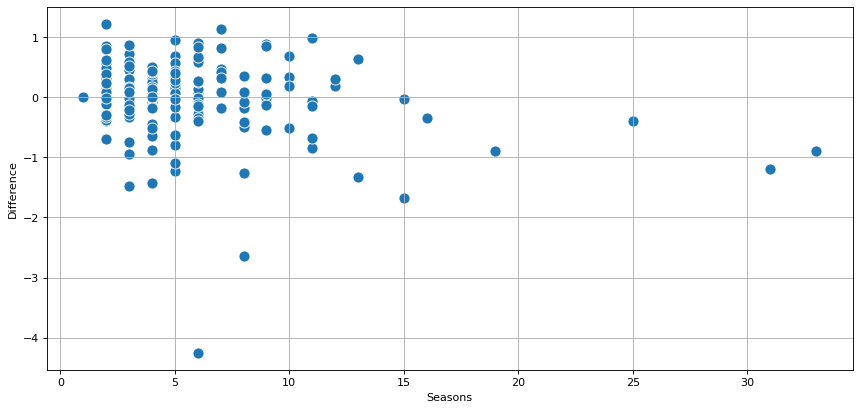

In [28]:
figure(figsize=(13, 6), dpi=80)

sns.scatterplot(data = Difference_df, x ="Seasons", y= "Difference", s = 100)
plt.grid()

In [29]:
long_df, short_df  = [x for _, x in Difference_df.groupby(Difference_df['Seasons'] <= 5.0)]
long_df = long_df.reset_index()
short_df = short_df.reset_index()

Following chart is approximation of the probability density function graph. We can conclude that distribution is somewhat normal with no high outliers on left or right. You can see that some data points seem to be minor outliers (Such as at -4 or -2). 

<AxesSubplot:ylabel='Density'>

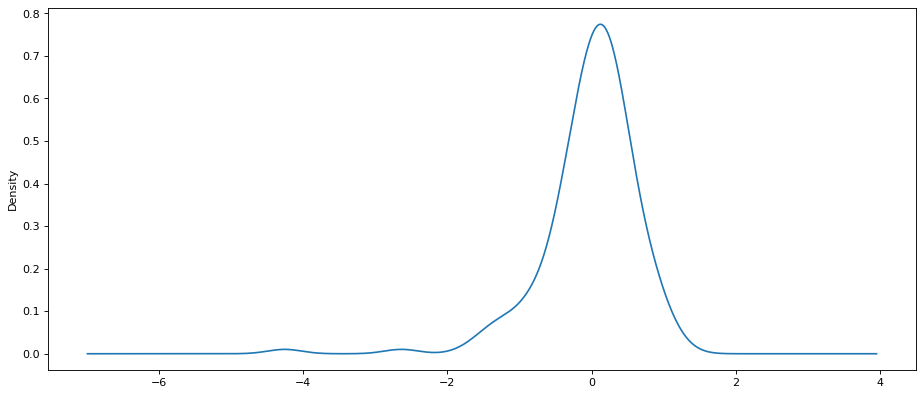

In [30]:
figure(figsize=(14, 6), dpi=80)
Difference_grouped_df = Difference_df.groupby("Difference").size()
# Difference_grouped_df.plot(kind="bar", rot = 90, yticks = np.arange(0, 22, 2))

Difference_df["Difference"].plot.kde()

From the given graph we can see that distributions of two groups (less than 5 seasons and more) are somewhat normal. Important detail to notice is that their means almost coincide which may indicate that there is no difference between difference of ratings of long and short TV shows.

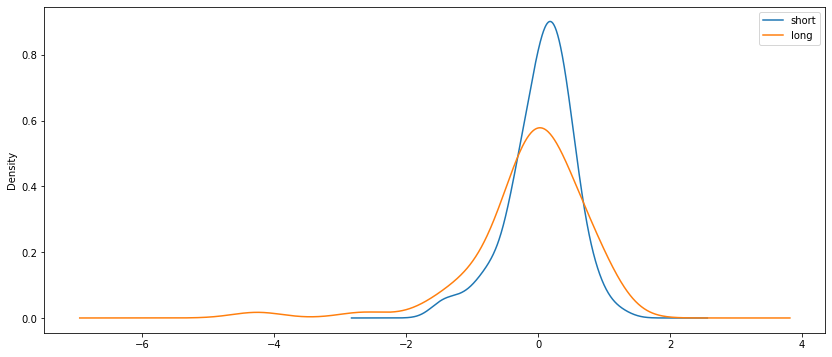

In [31]:
kde_df = pd.DataFrame({
    'short': Difference_df[Difference_df["Seasons"] <= 5]["Difference"],
    'long': Difference_df[Difference_df["Seasons"] > 5]["Difference"],
})
ax = kde_df.plot.kde(figsize=(14,6))

In [32]:
Difference_df["Difference"].mean()

-0.017860105798505235

#### Descriptive analysis

In [33]:
short_df = Difference_df[Difference_df['Seasons'] <= 5.0]
long_df = Difference_df[Difference_df['Seasons'] > 5.0]

In [34]:
short_df_mean = short_df['Difference'].mean()
short_df_std = short_df['Difference'].std()

print("Short TV shows (<= 5 seasons)")
print("Mean:" , short_df_mean)
print("Standard deviation:" , short_df_std)

Short TV shows (<= 5 seasons)
Mean: 0.04685135096241909
Standard deviation: 0.48987977793787724


In [35]:
long_df_mean = long_df['Difference'].mean()
long_df_std = long_df['Difference'].std()

print("Long TV shows (> 5 seasons)")
print("Mean:" , long_df_mean)
print("Standard deviation:" , long_df_std )

Long TV shows (> 5 seasons)
Mean: -0.12606614825119833
Standard deviation: 0.8678152067851161


#### Calculating t value

In [36]:
t_value = (long_df_mean - short_df_mean) / math.sqrt( long_df_std / len(long_df) + short_df_std / len(short_df))
t_value

-1.2535118180508542

In [37]:
deg_freedom = len(long_df) + len(short_df) - 2

numerator = ((short_df_std ** 2) /len(short_df) + (long_df_std ** 2)/len(long_df)) **2
denom_left = (((short_df_std**2) / (len(short_df))**2) / (len(short_df) - 1))
denom_right = (((long_df_std**2) / (len(long_df))**2) / (len(long_df) - 1))

deg_freedom = numerator/(denom_left + denom_right)
deg_freedom

59.98804199707485

#### Calculating p value

In [38]:
#find p-value
scipy.stats.t.sf(abs(t_value), df=deg_freedom)

0.1074415033914391

At confidence level 0.05, 0.10 is not less than 0.05. Therefore we cannot reject $H_0$.

#### 7.2 Last episode rating

**Rationale for hypothesis test:** <br>

While observing the dataset first time we made an assumption that last episode of each season has a higher rating than the rest of the season. We wanted to verify this numerically and thus constructed a hypothesis. In order to get a measure of rating for the rest of the season we take a mean and compare it to the value of the last episode. If it happens to be true then it might mean that the last episode inflates the season average.

**Hypothesis:**<br>
Let $X_{1..n}$ be a list of ratings of an arbitrary TV show. Then let $X_{1..(n-1)}$ represent the rating of all the episodes except last one and $X_{n}$ represent the rating of the last episode. <br>

$$
\begin{cases}
H_0: \mu_{X_{1..(n-1)}} = \mu_{X_{n}} \\
H_\alpha: \mu_{X_{1..(n-1)}} < \mu_{X_{n}} \\
\end{cases} 
$$

In [39]:
LastEpisode_df = pd.read_csv("lastEp.csv")
LastEpisode_df

,Unnamed: 0,ID,ShowName,Season,EpAvg,LastEp
0,0,tt0903747,['Breaking Bad'],1.0,8.683333,8.8
1,1,tt0903747,['Breaking Bad'],2.0,8.766667,9.2
2,2,tt0903747,['Breaking Bad'],3.0,8.691667,9.6
3,3,tt0903747,['Breaking Bad'],4.0,8.900000,9.9
4,4,tt0903747,['Breaking Bad'],5.0,9.340000,9.9
...,...,...,...,...,...,...
919,919,tt0310455,"[""Foyle's War""]",4.0,8.233333,8.1
920,920,tt0310455,"[""Foyle's War""]",5.0,8.350000,8.5
921,921,tt0310455,"[""Foyle's War""]",6.0,8.000000,8.9
922,922,tt0310455,"[""Foyle's War""]",7.0,8.300000,8.6


We decided to visualize the difference between the rest of the season rating and last episode rating. You could observe that last episode median is higher, however both median lies within the overlap of two boxes which implies that we need to take another step to make a conclusion about their difference. The left box is more consisted around the center value while box on the right has higher range and has large variability. This is due to the reason that one the left you can observe the average and on the right there are single data points.  

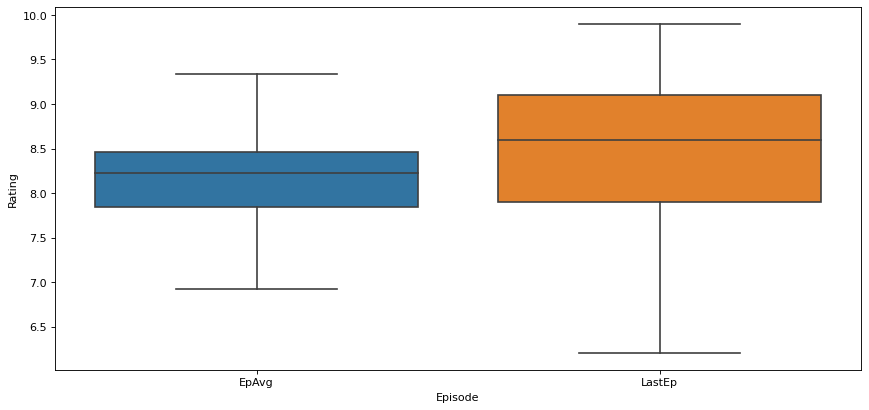

In [40]:
figure(figsize=(13, 6), dpi=80)
s = sns.boxplot(x="variable", y="value", data=pd.melt(LastEpisode_df[["EpAvg","LastEp"]]), showfliers = False)
s.set_xlabel("Episode") 
s.set_ylabel("Rating")
plt.show()

#### Descriptive analysis

In [41]:
epAvg_mean = LastEpisode_df["EpAvg"].mean()
epAvg_std = LastEpisode_df["EpAvg"].std()

print("Rating of all the episodes except last one in each TV show")
print("Mean:" , epAvg_mean)
print("Standard deviation:" , epAvg_std)

Rating of all the episodes except last one in each TV show
Mean: 8.108224835557552
Standard deviation: 0.6128389352354546


In [42]:
lastEp_mean = LastEpisode_df["LastEp"].mean()
lastEp_std = LastEpisode_df["LastEp"].std()

print("Rating last one in each TV show")
print("Mean:" , lastEp_mean)
print("Standard deviation:" , lastEp_std)

Rating last one in each TV show
Mean: 8.410497835497841
Standard deviation: 0.9700656013132353


#### Calculating t value

In [43]:
t_value_ep = (epAvg_mean - lastEp_mean) / math.sqrt(epAvg_std / len(LastEpisode_df) + lastEp_mean / len(LastEpisode_df))
t_value_ep

-3.0588047688203166

In [44]:
deg_freedom_ep = len(LastEpisode_df) - 1

deg_freedom_ep

923

#### Calculating p value

In [45]:
#find p-value
scipy.stats.t.sf(abs(t_value_ep), df=deg_freedom_ep)

0.001143179368677813

At confidence level 0.05, 0.01 is less than 0.05. Therefore we do reject $H_0$.

### 8. Reasoning with the data <a class="anchor" id="chapter8"></a>

Firstly, we were not able to prove that there is a correlation between life-span of a TV show and the rating. In other words the p-value obtained was not significant enough to reject the null hypothesis. Although, our expectation was to reject the hypothesis. Through analysis we actually can see that this cannot be the case. We had an assumption that normally the last episode has rating the the rest of the season, which inflates the overall rating. We were indeed able to prove that this is the case. 

In general, we presume that life-span of TV show has nothing to do with viewer perception. It is much more likely that more semantic factors such as writing behind the show, cast actors or even possibly budget have a significant affect on rating. These factors were not  taken in consideration in our study. Even though they are extremely complicated or even impossible to quantify, they are arguably the main driving force for show's life-span and success. 

### 9. Conclusion <a class="anchor" id="chapter9"></a>

In conclusion, through visual analysis of obtained graphs and hypothesis testing we were not able to reject the main null hypothesis which proposed that TV shows rating doesn't change significantly with length. However looking at our second hypothesis which discussed rating of the last episode compared to the rest of the season. By rejecting the null hypothesis we found that in general case the last episode is higher rated then other episodes. This could introduce some inflation to the whole season rating. However, we tend to think that there exist some crucial factors outside of the scope of our study that have more significant effect that the length of the TV Show. 

### 10. Bibliography  <a class="anchor" id="chapter10"></a>

*[1] Comparison of Two Means. (2022).  from http://www.stat.yale.edu/Courses/1997-98/101/meancomp.htm <br>
[2] (2022). from https://ncss-wpengine.netdna-ssl.com/wp-content/themes/ncss/pdf/Procedures/NCSS/Two-Sample_T-Test.pdf*